
# Project 13: Model Calibration For Equities
## UNI: dk2985

Import modules

In [7]:
import numpy as np
import pandas as pd

import cmath
import math


from scipy.optimize import fmin
from scipy.optimize import fmin_bfgs
from scipy.optimize import brute

from scipy import interpolate

#dataprocessing module
import dataProcessing as dp

#selecting the model and optimising params
import genericModel as gm

#calibration module
import calibration as gc

#plotting
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import time

Set global parameters

In [8]:
#Parameters
models = ('Heston','VG','VGSA','VGSSD')
stocks = ('apple','msft','fb')
algos = ('Nelder_Mead','BFGS','Grid_Search')
# spots = [220.65, 109.63, 154.78]
myspots = {'apple':220.65,
           'msft':109.63,
           'fb':154.78}
# spot price as of close of October 22nd, 2018
optionType = ('Call', 'Put')

# risk free rate
r = 0.0245
# dividend rate
q = 0.005

# Parameters
eta_global = 0.2
n = 12



In [9]:
#Calibration Model

def f(model,stock,algo,S0,optionType,params, r=r, q=q,eta_global=eta_global, n=n):

    maturities, strikes, optionPrices = dp.readNPlot(excel_file = "data_"+stock+".xlsx", option = optionType)
    marketPrices = optionPrices
    maturities_years = maturities/365.0

    if (optionType=='Call'):
        alpha = 1.5
    elif (optionType=='Put'):
        alpha = -1.5        

    arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta_global, n, model)
    
    lenT = len(maturities)
    lenK = len(strikes)
    modelPrices = np.zeros((lenT, lenK))
    start_time = time.time()
    params2 = gm.generic_algo(algo, model, params, arg, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta_global, n)

    for ii in range(lenT):
        for jj in range(lenK):
            T = maturities_years[ii]
            K = strikes[jj]
            [km, cT_km] = gc.generic_FFT(params2, S0, K, r, q, T, alpha, eta_global, n, model)
            modelPrices[ii,jj] = cT_km[0]
#             print(modelPrices[ii,jj])

    fig = plt.figure(figsize=(12.,12.))
    labels = []
    colormap = cm.Spectral
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
    
    for kk in range(len(maturities)):
        plt.plot(strikes, optionPrices[kk,:], 'x')
        labels.append('T = ' + str(maturities[kk]))

    for kk in range(len(maturities)):
        plt.plot(strikes, modelPrices[kk,:], '+')
        labels.append('T = ' + str(maturities[kk]))
    
    plt.legend(labels, loc='upper right', ncol=2)
    #plt.grid(alpha=0.25)
    plt.xlabel('Strike')
    plt.ylabel('Price')
    plt.title('Market vs. Model')
    #plt.savefig('MarketvsModel_BFGS.png')
    plt.show() 
    print("--- %s seconds ---" % (time.time() - start_time))
    return params2

apple
Parameters of the model [1.3, 0.056, 0.0625, -0.43, 0.064]


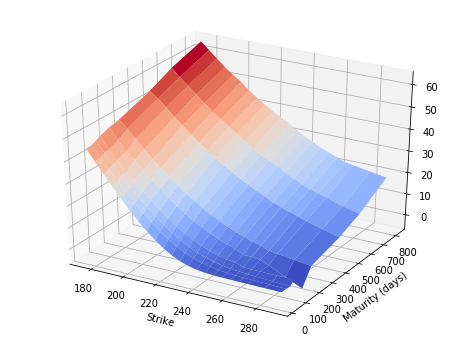


new min found
3.4769065399060737


new min found
2.824231373455865


new min found
2.8086055392958955


new min found
2.6369998964848103


new min found
2.01446853603667


new min found
1.9991810783392878


new min found
1.8782340402667035


new min found
1.2983812864937858


new min found
1.2844661382817208


new min found
1.2592343271761655


new min found
1.248583127631243


Solution of grid search:
[1.8, 0.056, 0.0725, -0.53, 0.054]
Optimal rmse = 1.248583127631243


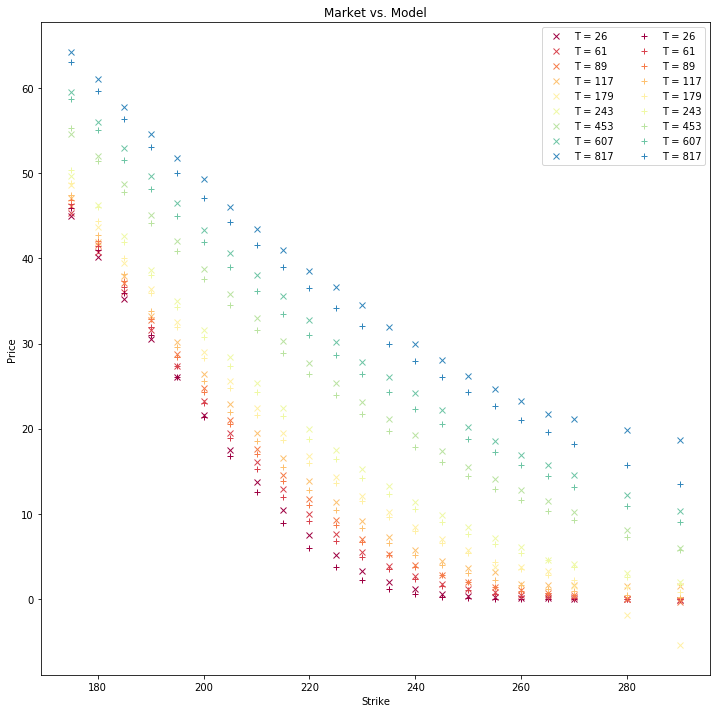

--- 179.12500762939453 seconds ---


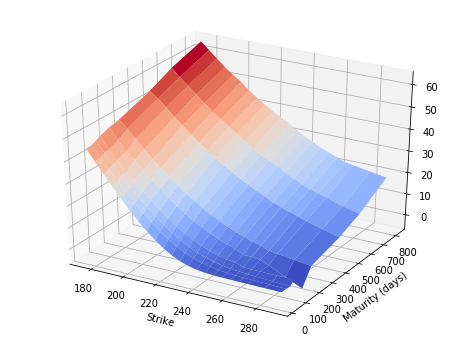

t: (array([ 1.79191526,  0.06478015,  0.06810917, -0.51915476,  0.05831938]), 0.7327170457120185, 10, 19, 2)


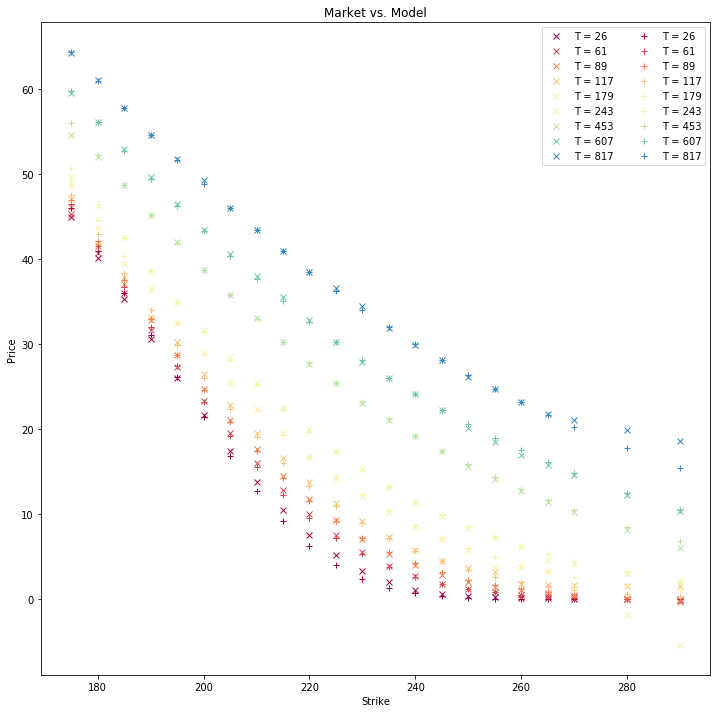

--- 142.7633559703827 seconds ---


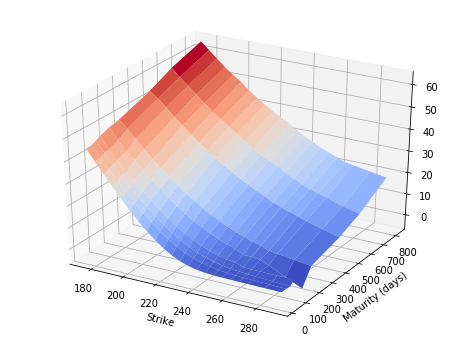

         Current function value: 0.729957
         Iterations: 10
         Function evaluations: 126
         Gradient evaluations: 18
[ 1.67074962  0.06578132  0.04852034 -0.82961337  0.05777037]


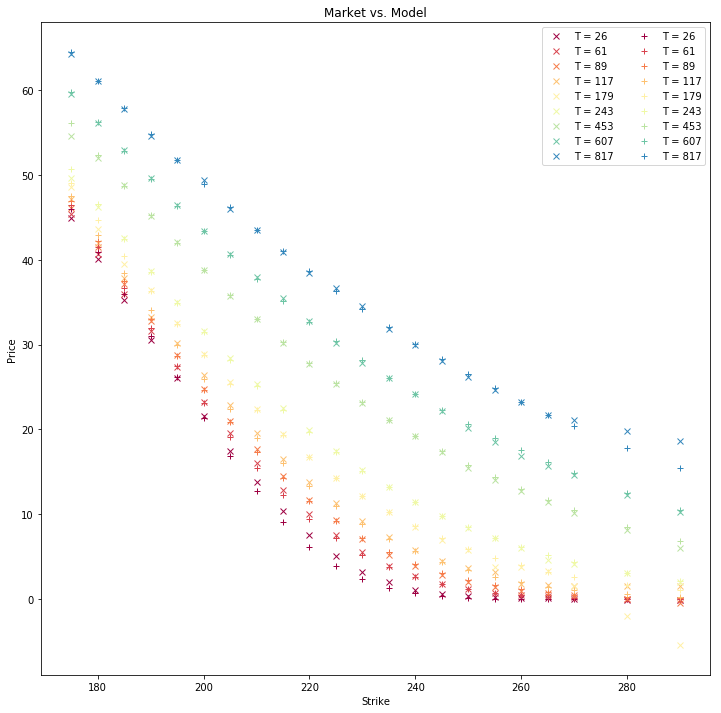

--- 826.2466340065002 seconds ---
msft
Parameters of the model [1.3, 0.056, 0.0625, -0.43, 0.064]


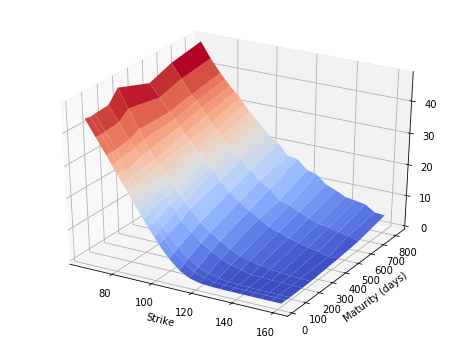


new min found
1.0482245391545646


new min found
0.878889537017298


new min found
0.8693944005431077


new min found
0.7807460138475011


new min found
0.6909879309611728


new min found
0.6826094078139441


new min found
0.6391562143510112


new min found
0.6317348417023596


new min found
0.6271935117197224


new min found
0.6219849711654871


Solution of grid search:
[1.8, 0.056, 0.0725, -0.53, 0.044]
Optimal rmse = 0.6219849711654871


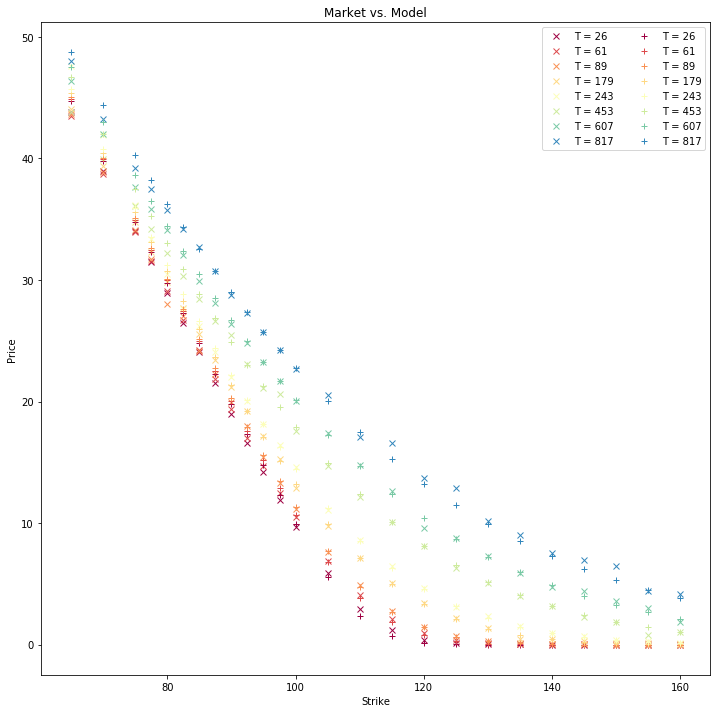

--- 80.06241512298584 seconds ---


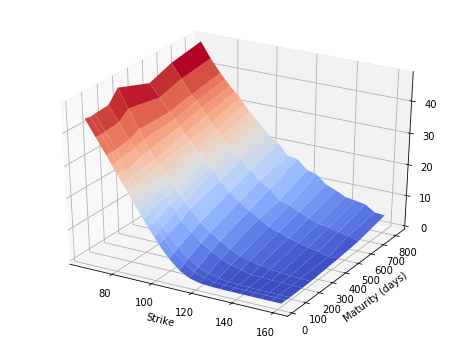

t: (array([ 2.00529334,  0.05745418,  0.05581693, -0.53967772,  0.04179034]), 0.6152986958043861, 10, 20, 2)


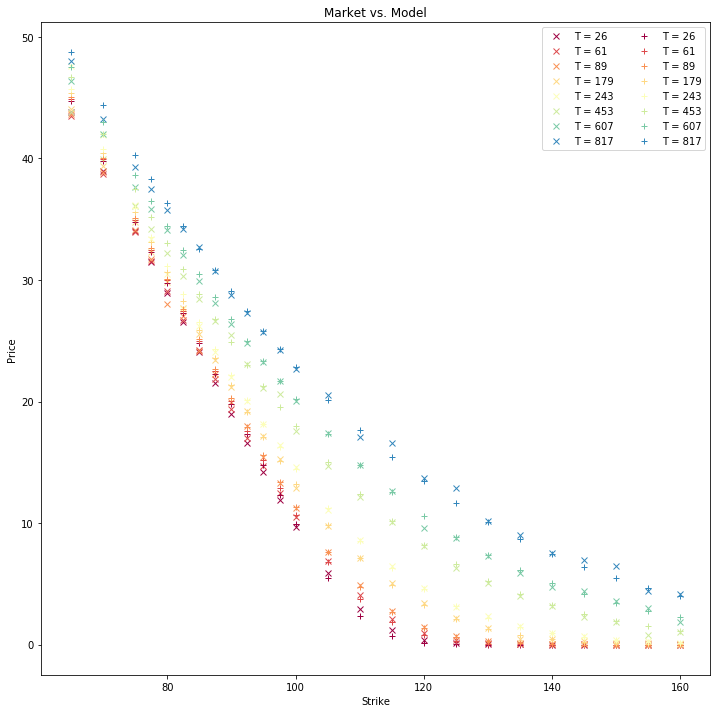

--- 65.77806305885315 seconds ---


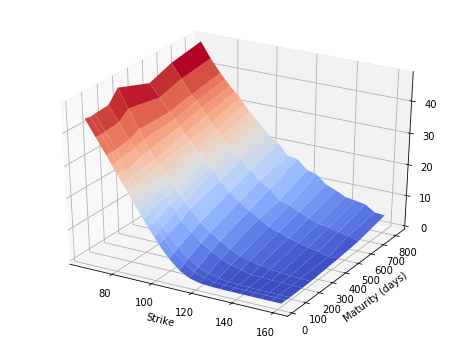

         Current function value: 0.602403
         Iterations: 10
         Function evaluations: 133
         Gradient evaluations: 19
[ 1.75429663  0.0570821   0.01002977 -0.4779699   0.04149126]


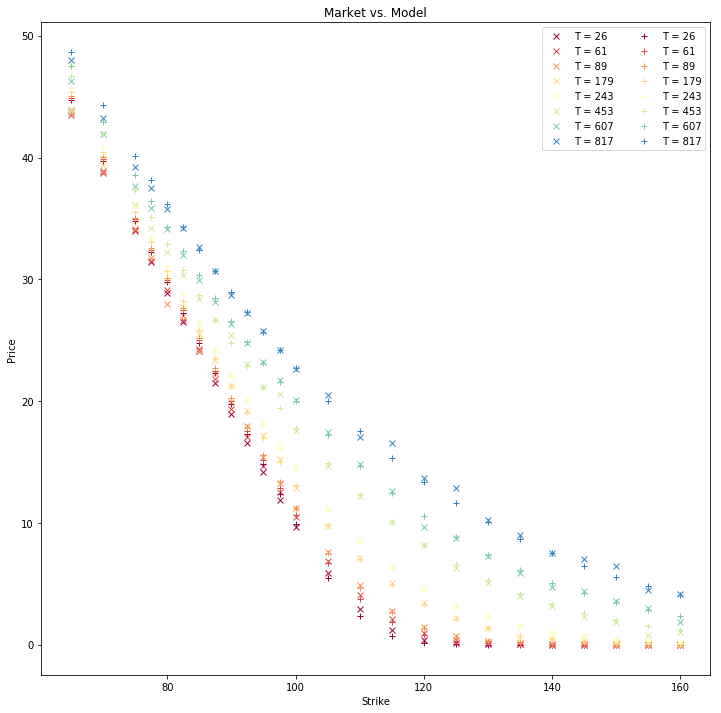

--- 424.2407748699188 seconds ---
fb
Parameters of the model [1.3, 0.056, 0.0625, -0.43, 0.064]


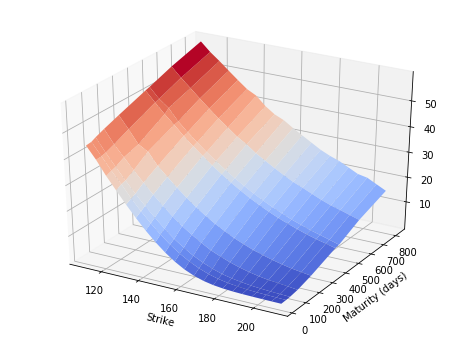


new min found
6.357075268191412


new min found
5.890375722166472


new min found
5.878563135333028


new min found
5.766003316699118


new min found
5.31484693347302


new min found
5.30341672333418


new min found
5.205159944343562


new min found
4.767287253109951


new min found
4.756215431590824


new min found
4.736082136963055


new min found
4.727004596203461


Solution of grid search:
[1.8, 0.056, 0.0725, -0.53, 0.054]
Optimal rmse = 4.727004596203461


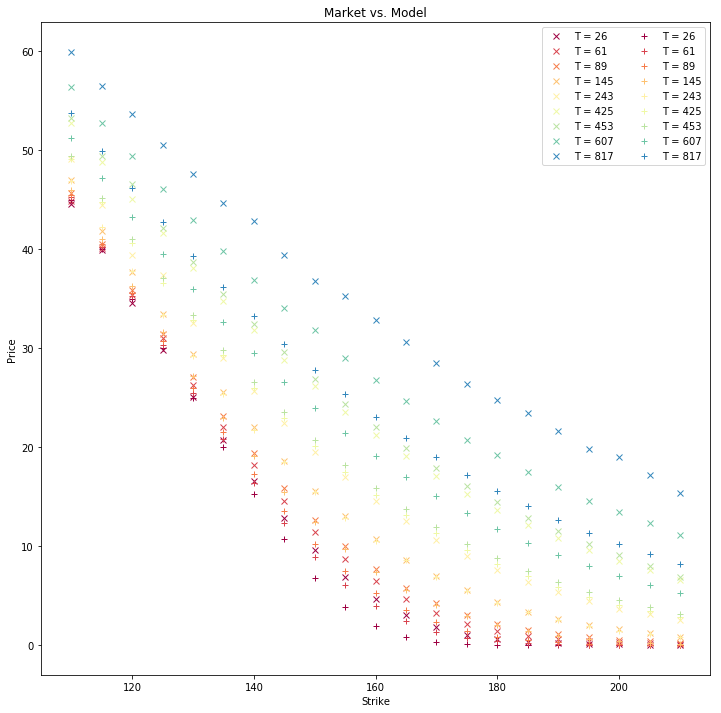

--- 80.09358954429626 seconds ---


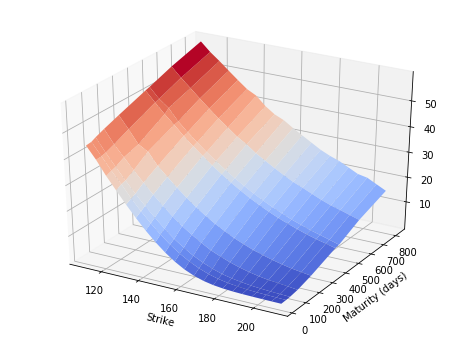

t: (array([ 1.85862205,  0.06951033,  0.06110425, -0.47383499,  0.06533869]), 3.5370689698908917, 10, 19, 2)


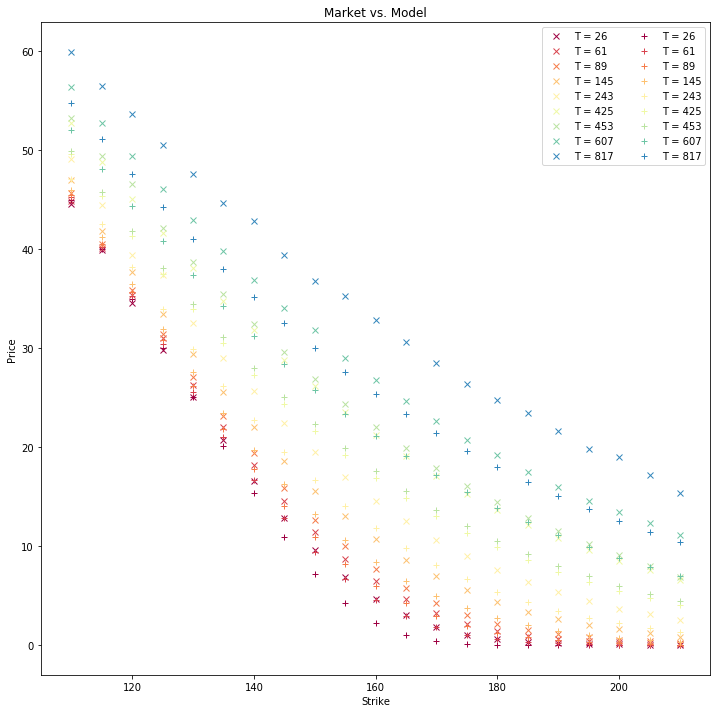

--- 63.906193256378174 seconds ---


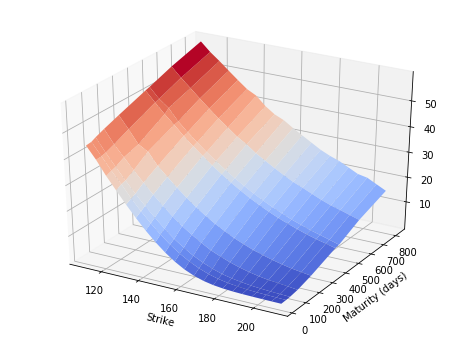

         Current function value: 0.367437
         Iterations: 10
         Function evaluations: 112
         Gradient evaluations: 16
[ 1.42547451  0.93661281  0.53716291 -0.39949774  0.59138817]


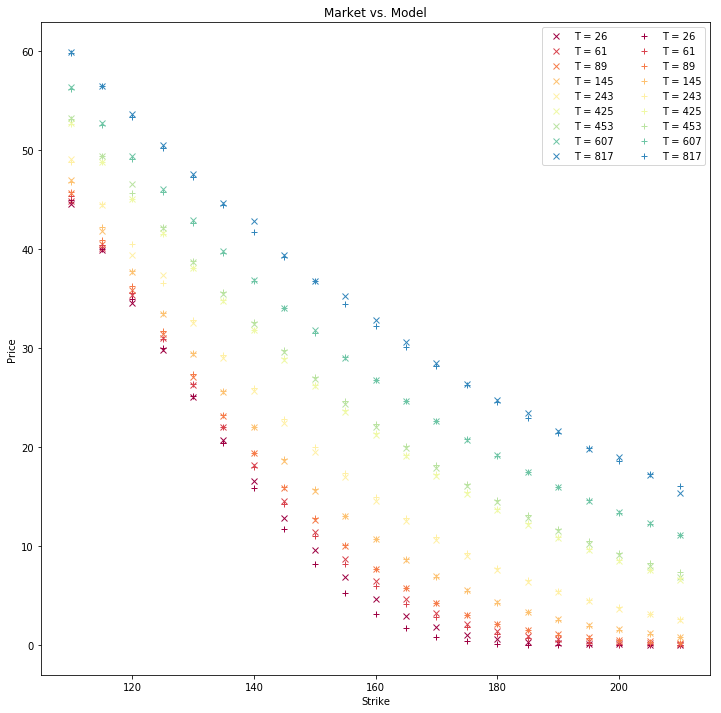

--- 353.1312732696533 seconds ---


In [4]:
for j in stocks:
    print(j)
    S0 = myspots[j]
    params_gridsearch = f('Heston',j,'Grid_Search',S0,'Call',gm.generic_model('Heston'))
    final_params = f('Heston',j,'Nelder_Mead',S0,'Call',params_gridsearch)
    bfgs_params = f('Heston',j,'BFGS',S0,'Call',params_gridsearch)

apple
Parameters of the model [0.25, 0.4, -0.3, 0.05]


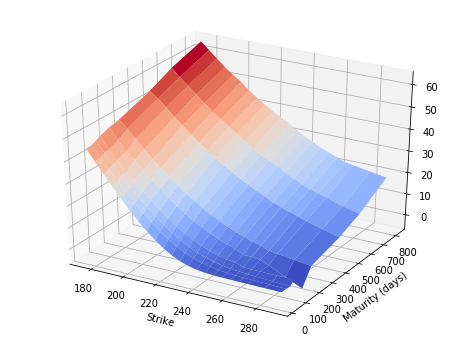


new min found
7.394241141987653


new min found
6.991415757216321


new min found
6.593200535954637


new min found
6.182968933029907


new min found
4.561906006354535


new min found
3.536855148670034


new min found
2.702409586679587


new min found
2.0956054412097034


Solution of grid search:
[0.2, 0.05, 0.0, 0.5]
Optimal rmse = 2.0956054412097034


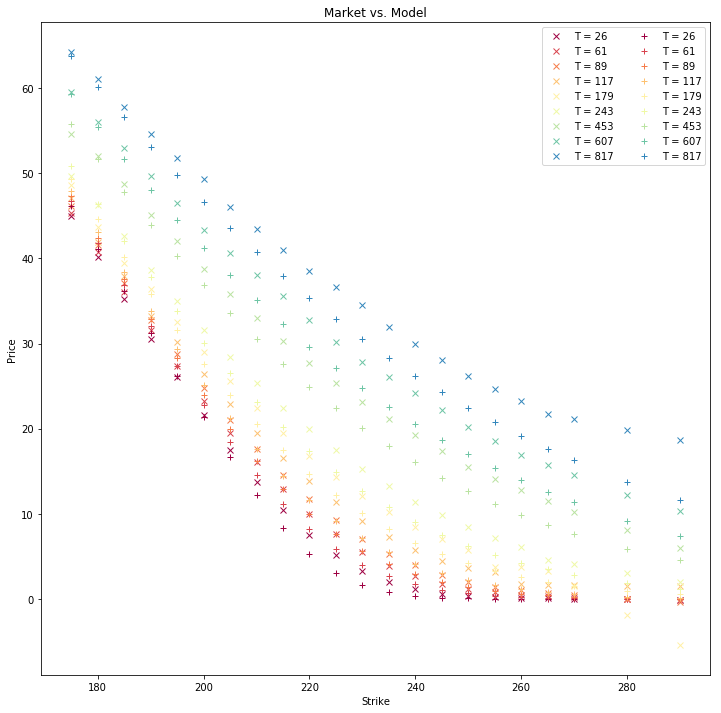

--- 214.60326099395752 seconds ---


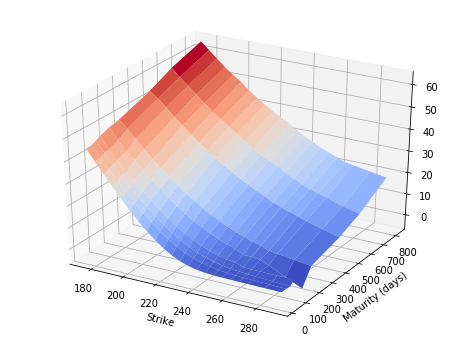

t: (array([2.23162231e-01, 4.88577271e-02, 2.55279541e-05, 4.92353821e-01]), 0.9724943313612558, 10, 19, 2)


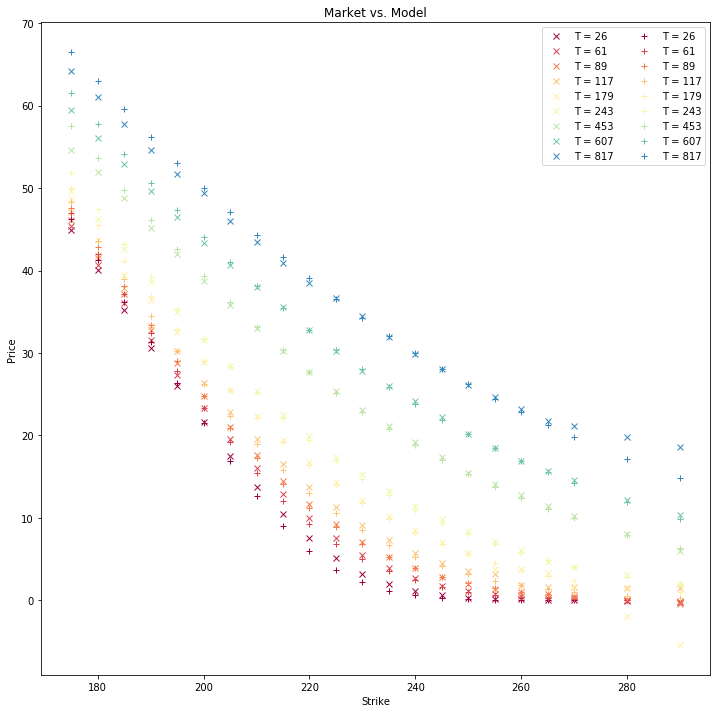

--- 59.06196618080139 seconds ---


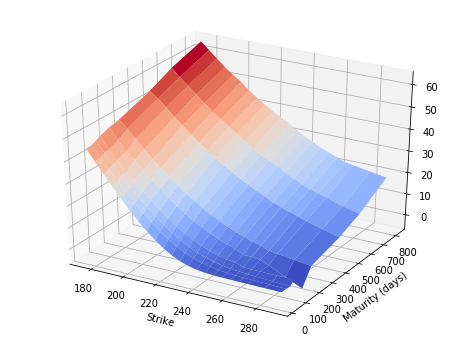

         Current function value: 0.781316
         Iterations: 5
         Function evaluations: 131
         Gradient evaluations: 20
[ 0.23957079  0.00648749 -0.01440951  0.4700589 ]


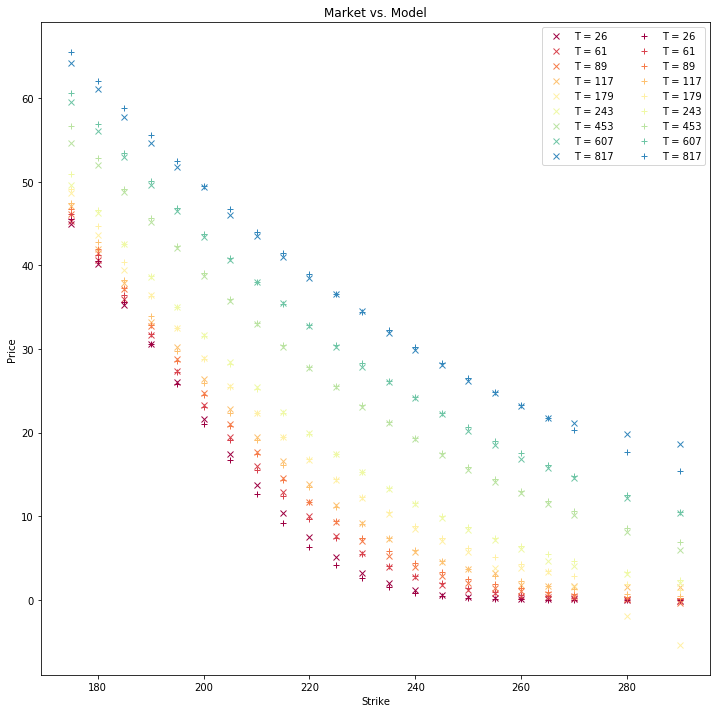

--- 426.1383512020111 seconds ---
msft
Parameters of the model [0.25, 0.4, -0.3, 0.05]


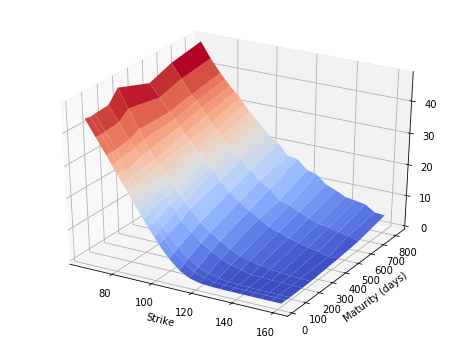


new min found
2.839474430357656


new min found
2.6477794037794617


new min found
2.4465662244409594


new min found
2.2331383555593622


new min found
1.7477318885696773


new min found
1.3382134312448224


new min found
1.0293994698914326


new min found
0.8787283625144723


Solution of grid search:
[0.2, 0.05, 0.0, 0.5]
Optimal rmse = 0.8787283625144723


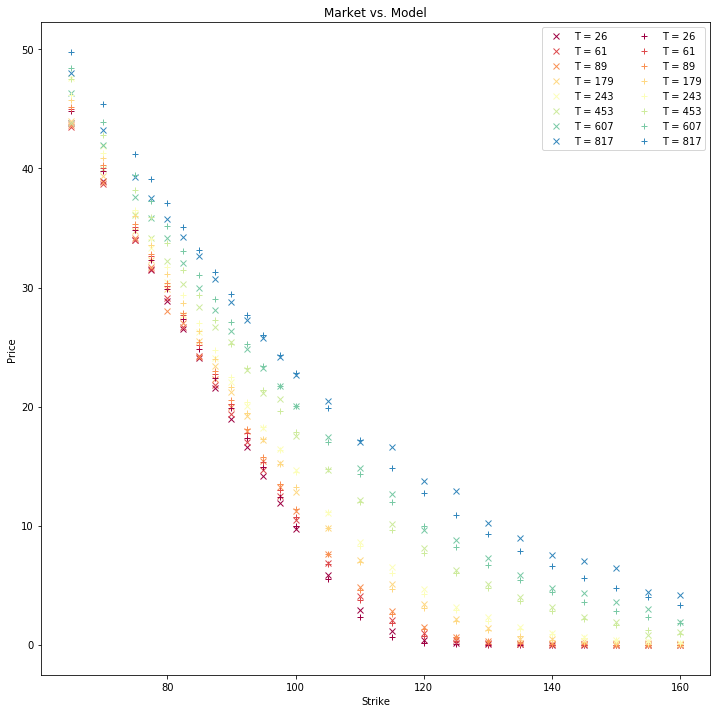

--- 222.65794444084167 seconds ---


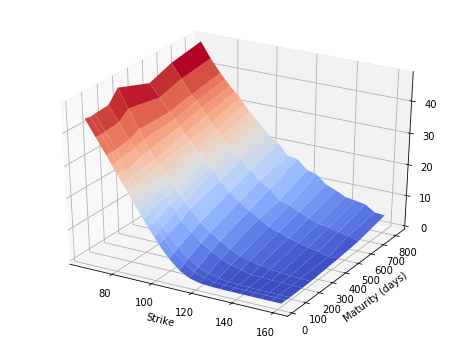

t: (array([ 0.19595703,  0.05179077, -0.00113928,  0.55462646]), 0.8533165084485796, 10, 18, 2)


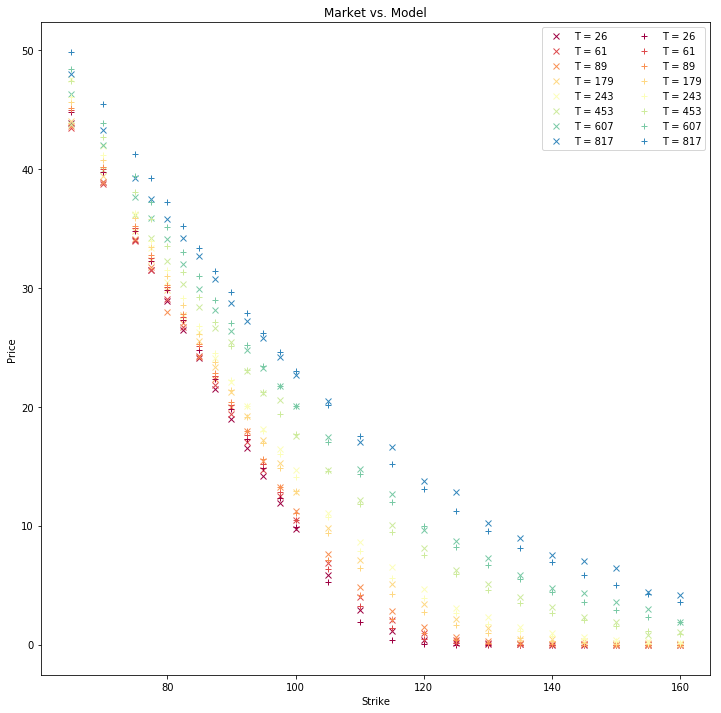

--- 57.40286636352539 seconds ---


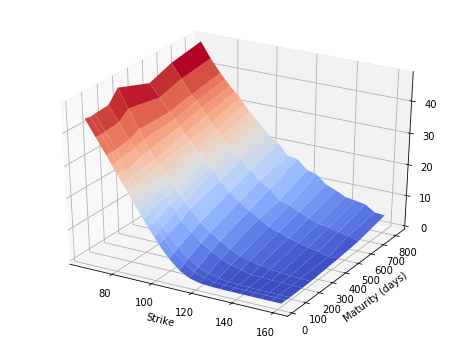

         Current function value: 0.491459
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 16
[ 0.23724101  0.01921406 -0.03309388  0.47212989]


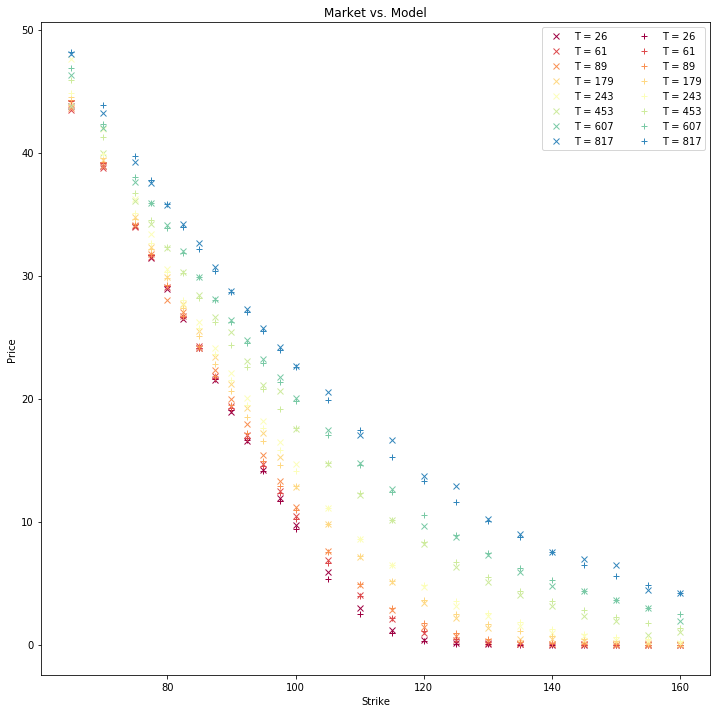

--- 332.3577070236206 seconds ---
fb
Parameters of the model [0.25, 0.4, -0.3, 0.05]


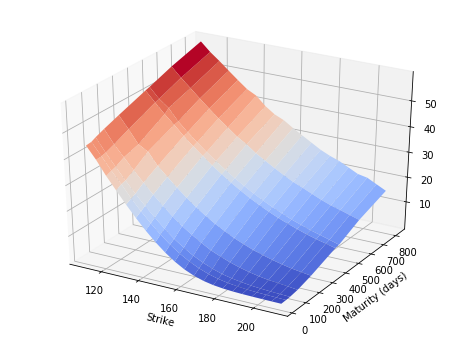


new min found
9.131262289507195


new min found
8.887046260053824


new min found
8.610124005478298


new min found
8.296235909451411


new min found
6.533362688604655


new min found
6.10480140297708


new min found
5.685750993019209


new min found
5.258889826253998


new min found
4.725313116164471


new min found
3.899220719803166


new min found
3.196619761273188


new min found
2.6138427494084424


new min found
2.602914372609546


new min found
2.165742677486735


new min found
2.163085284600076


new min found
1.120412605526564


new min found
1.1063700587078085


Solution of grid search:
[0.30000000000000004, 0.1, 0.0, 0.4]
Optimal rmse = 1.1063700587078085


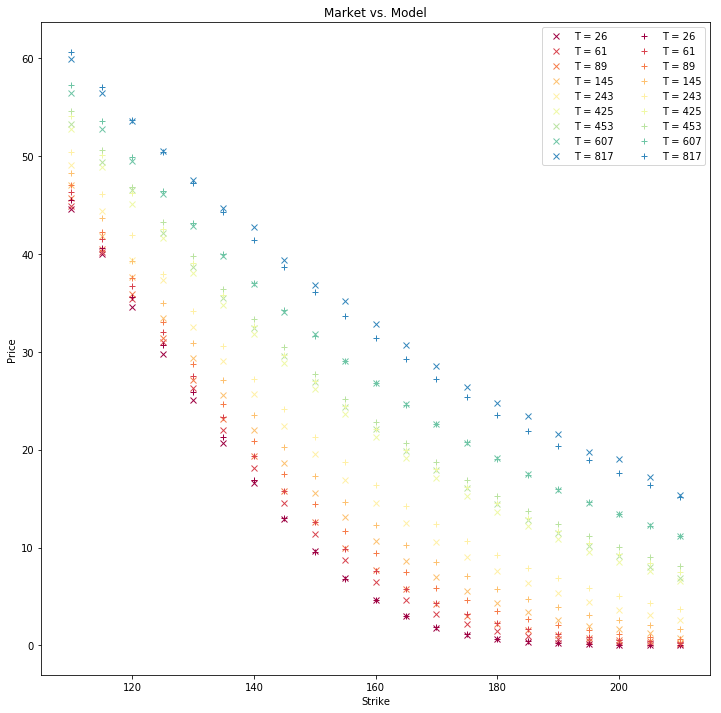

--- 211.63262009620667 seconds ---


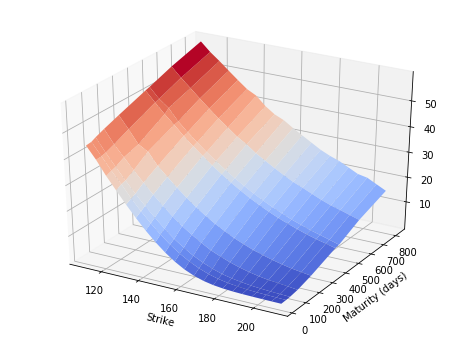

t: (array([2.91666870e-01, 1.01749573e-01, 1.84173584e-05, 4.53580322e-01]), 0.611632507699985, 10, 20, 2)


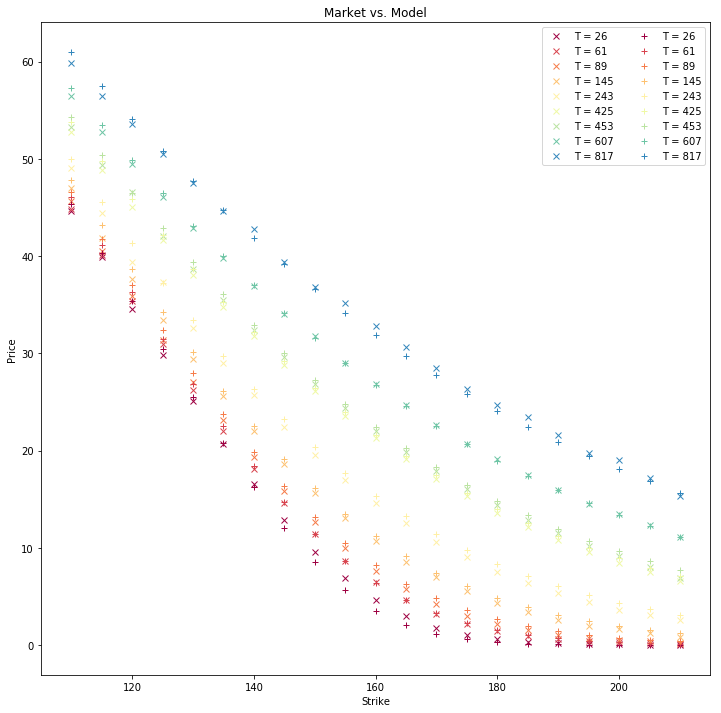

--- 62.035706758499146 seconds ---


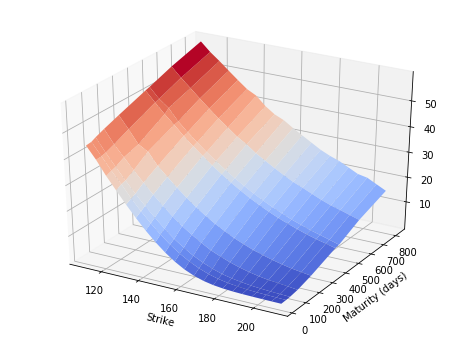

         Current function value: 0.427661
         Iterations: 4
         Function evaluations: 122
         Gradient evaluations: 19
[ 0.29543716  0.01149079 -0.01175085  0.49031724]


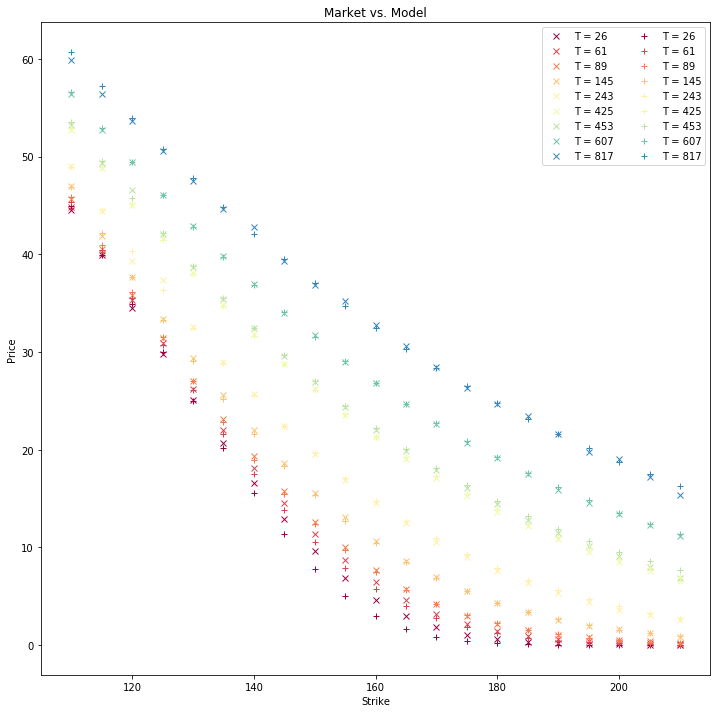

--- 357.9314911365509 seconds ---


In [6]:
for j in stocks:
    print(j)
    S0 = myspots[j]
    params_gridsearch = f('VGSSD',j,'Grid_Search',S0,'Call',gm.generic_model('VGSSD'))
    final_params = f('VGSSD',j,'Nelder_Mead',S0,'Call',params_gridsearch)
    bfgs_params = f('VGSSD',j,'BFGS',S0,'Call',params_gridsearch)

apple
Parameters of the model [0.5, 0.13, -0.13, 10, 2, 10]


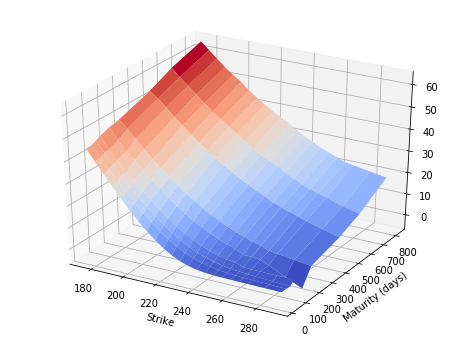


new min found
26.828218985304698


new min found
26.828218521714376


new min found
26.828217748905846


new min found
26.828216666642017


new min found
26.827721089006236


new min found
26.82772054294326


new min found
26.827719632657168


new min found
26.827718357876265


new min found
26.827122240343765


new min found
26.827121600196005


new min found
26.8271205330564


new min found
26.827119038584687


new min found
26.81569662606631


new min found
26.815695086740376


new min found
26.815692520677096


new min found
26.815688927094165


new min found
26.813295802466612


new min found
26.813293995609143


new min found
26.813290983130635


new min found
26.813286763450964


new min found
26.810516058484097


new min found
26.81051378472388


new min found
26.81050999281715


new min found
26.810504679292517


new min found
26.743023961565957


new min found
26.743015290362386


new min found
26.74300082331201


new min found
26.742980537811658


new min found
26.728509151

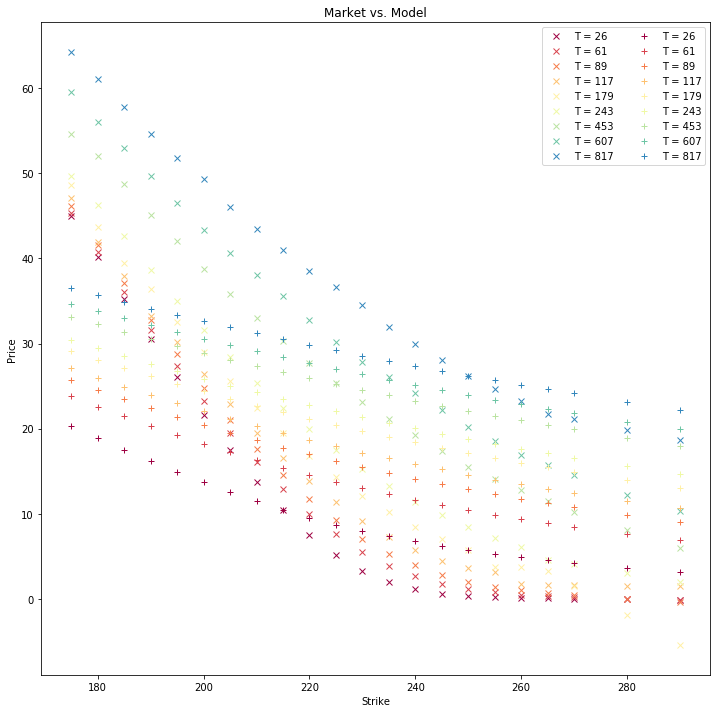

--- 118009.05845069885 seconds ---


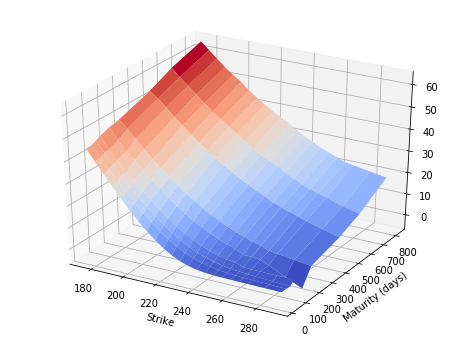

t: (array([ 0.6025    ,  0.26892361, -0.08229167,  3.91388889,  0.45361111,
        0.05086806]), 10.533253217258089, 10, 20, 2)


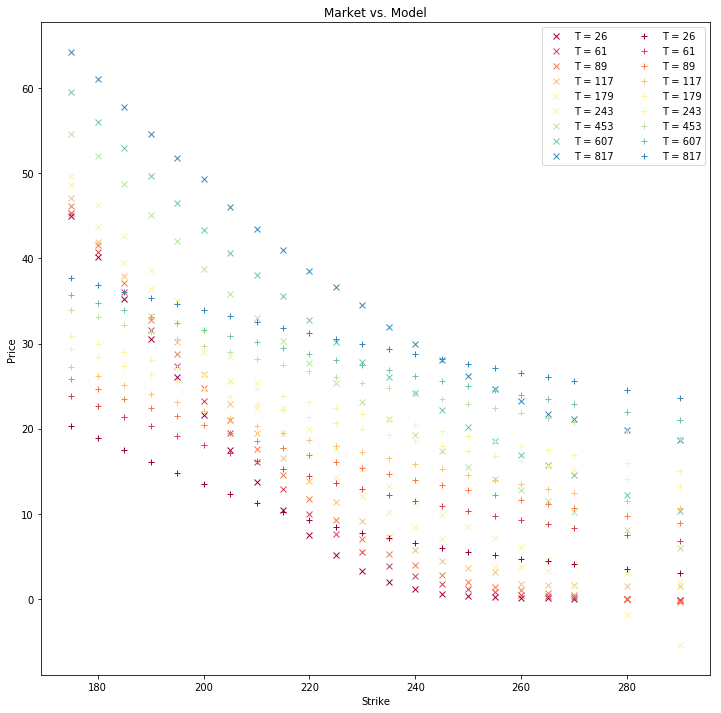

--- 148.1541554927826 seconds ---


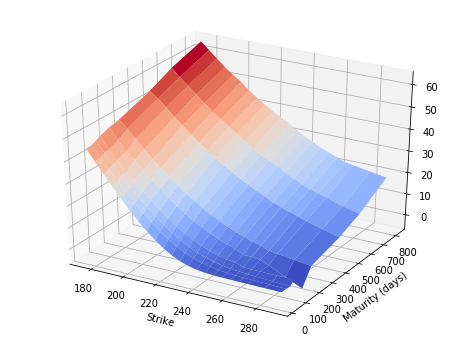

         Current function value: 8.491547
         Iterations: 10
         Function evaluations: 136
         Gradient evaluations: 17
[3.24851423e-03 2.38998880e-01 2.68523220e-01 4.65040858e+00
 6.27074860e-01 2.95274742e-02]


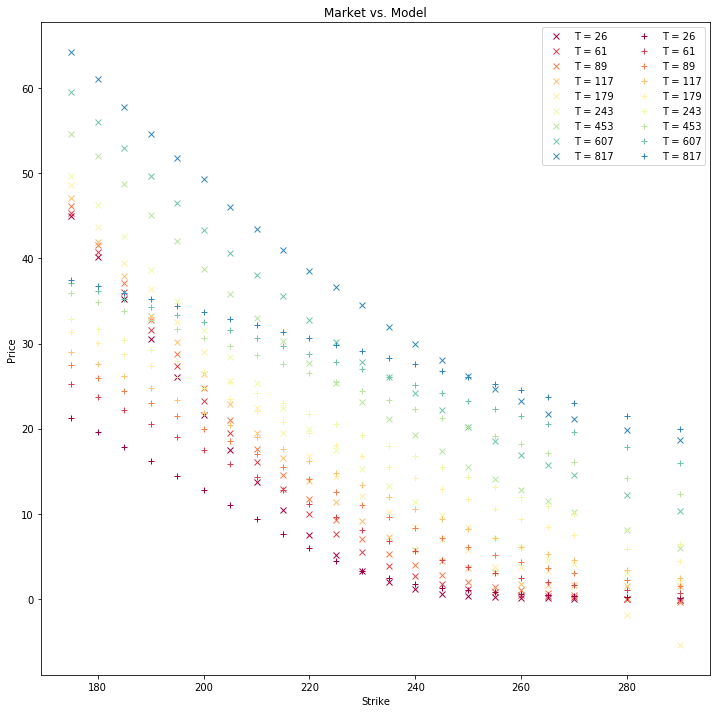

--- 947.7552890777588 seconds ---
msft
Parameters of the model [0.5, 0.13, -0.13, 10, 2, 10]


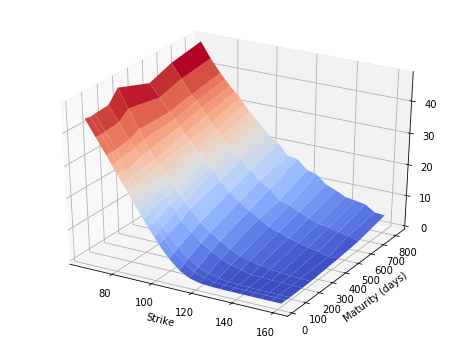


new min found
21.530213633554023


new min found
21.53020912353237


new min found
21.530201605404024


new min found
21.530191077026203


new min found
21.522119519339615


new min found
21.522114384497254


new min found
21.522105823881983


new min found
21.52209383366499


new min found
21.513093555988206


new min found
21.51308735362228


new min found
21.51307701099834


new min found
21.513062520058856


new min found
21.436213465493523


new min found
21.43620416096786


new min found
21.436188645409285


new min found
21.436166906727895


new min found
21.418556748643688


new min found
21.418543445280303


new min found
21.418521251347645


new min found
21.418490134244784


new min found
21.396130216727073


new min found
21.396108318213603


new min found
21.396071781489095


new min found
21.39602054773644


new min found
21.171445811872665


new min found
21.171394942258182


new min found
21.171310072860056


new min found
21.171191073799456


new min found
21.09033367

In [ ]:
for j in stocks:
    print(j)
    S0 = myspots[j]
    params_gridsearch = f('VGSA',j,'Grid_Search',S0,'Call',gm.generic_model('VGSA'))
    final_params = f('VGSA',j,'Nelder_Mead',S0,'Call',params_gridsearch)
    bfgs_params = f('VGSA',j,'BFGS',S0,'Call',params_gridsearch)

Parameters of the model [0.5, 0.13, -0.13, 10, 2, 10]


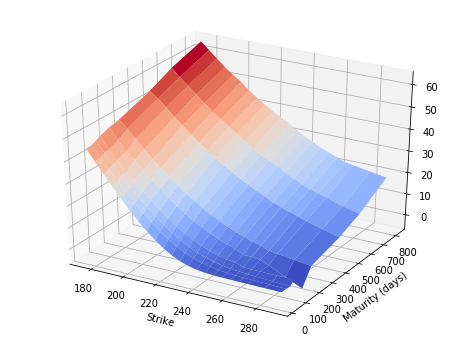

         Current function value: 7.944407
         Iterations: 10
         Function evaluations: 242
         Gradient evaluations: 30
[ 0.07048644  0.23466166  0.57148947 14.31446904  0.49284741  7.53531525]


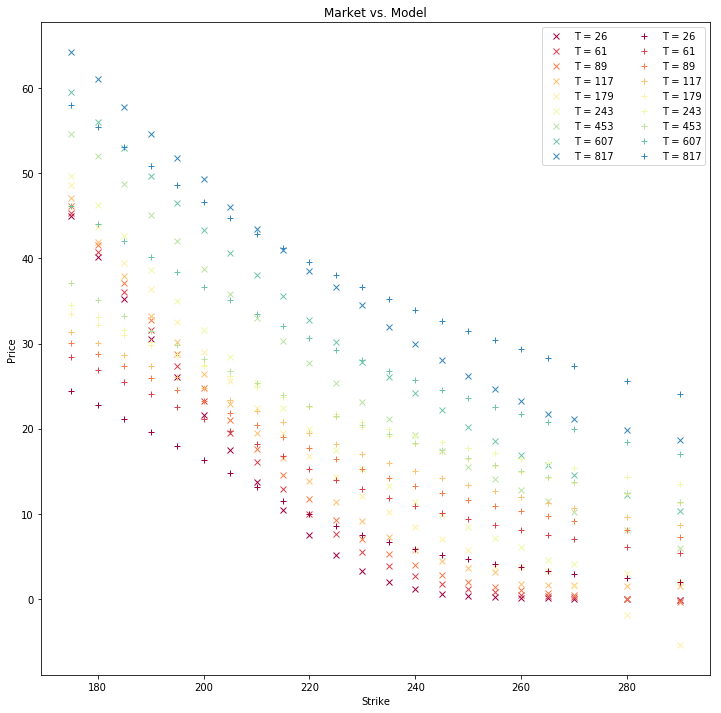

--- 3323.348270893097 seconds ---


In [5]:
S0= 220.65
bfgs_params = f('VGSA','apple','BFGS',S0,'Call',gm.generic_model('VGSA'))